In [33]:
import pandas as pd

In [2]:
file_path = '../labeled_merged.csv'

In [19]:
def split_cities(x):
    try:
        result = x.split(';')[0]
    except:
        result = x
    return result


raw_df = pd.read_csv(file_path)
raw_df['urban_center'] = raw_df['Cities in Urban Center_copy'].apply(lambda x: split_cities(x))
raw_df = raw_df.drop(columns=['Population2010','INCM_CMI','DEV_CMI','UC_Grouping','Latitude','Longitude','E_BM_NM_LST'])

raw_df.head(2)

,MHLTH_AdjPrev,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,GDP15_SM,E_WR_T_14,State,Cities in Urban Center_copy,Division,Region,Biome_Class,urban_center
0,15.6,0.494568,219.996230,0.773812,74.85,196387.76700,152.894608,778.534274,6.184143e+09,17.497644,AL,Birmingham;,East South Central,South,0,Birmingham
1,13.4,0.521522,88.700999,0.802599,66.37,86467.06209,59.674004,690.135667,2.498489e+09,16.321889,AL,Huntsville,East South Central,South,0,Huntsville


In [81]:
# group cofounders
greenness_lst = ['E_GR_AV14','E_GR_AT14'] 
social_development_lst = ['SDG_A2G14','SDG_OS15MX']
socioeco_lst = ['P15', 'B15', 'BUCAP15', 'GDP15_SM']
temperature_lst = ['E_WR_T_14']


def normalize_df(df,not_norm_col):
    indf = df.copy()
    for col in indf.columns:
        if col not in not_norm_col:
            max_val = indf[col].max()
            min_val = indf[col].min()
            indf[col] = (indf[col] - min_val) / (max_val - min_val)
    return indf

nor_df = normalize_df(raw_df,not_norm_col = ['State','Cities in Urban Center_copy','Division','Region','Biome_Class','urban_center'])
nor_df.head(2)

,MHLTH_AdjPrev,E_GR_AV14,E_GR_AT14,SDG_A2G14,SDG_OS15MX,P15,B15,BUCAP15,GDP15_SM,E_WR_T_14,State,Cities in Urban Center_copy,Division,Region,Biome_Class,urban_center
0,0.745283,0.767968,0.034655,0.853879,0.705163,0.008759,0.030091,0.898054,0.006957,0.655885,AL,Birmingham;,East South Central,South,0,Birmingham
1,0.537736,0.834817,0.011179,0.885658,0.600420,0.001843,0.009908,0.775803,0.001489,0.602726,AL,Huntsville,East South Central,South,0,Huntsville


In [82]:
def combine_features(df,feature_lst,col_name):
    indf = df.copy()
    indf[col_name] = indf[feature_lst].mean(axis=1)
    indf = indf.drop(columns=feature_lst)
    return indf

up_nor_df01 = combine_features(nor_df,greenness_lst,'Greenness')
up_nor_df02 = combine_features(up_nor_df01,socioeco_lst,'Socioeco')
up_nor_df03 = combine_features(up_nor_df02,social_development_lst,'Social_Development')
combine_df = combine_features(up_nor_df03,temperature_lst,'Temperature')
combine_df.head(2)

,MHLTH_AdjPrev,State,Cities in Urban Center_copy,Division,Region,Biome_Class,urban_center,Greenness,Socioeco,Social_Development,Temperature
0,0.745283,AL,Birmingham;,East South Central,South,0,Birmingham,0.401312,0.235965,0.779521,0.655885
1,0.537736,AL,Huntsville,East South Central,South,0,Huntsville,0.422998,0.197261,0.743039,0.602726


In [83]:
corr = combine_df[['MHLTH_AdjPrev','Greenness','Socioeco','Temperature','Social_Development']].corr()
corr

,MHLTH_AdjPrev,Greenness,Socioeco,Temperature,Social_Development
MHLTH_AdjPrev,1.000000,0.003819,-0.135175,-0.033752,0.250162
Greenness,0.003819,1.000000,0.665777,-0.039771,0.339267
Socioeco,-0.135175,0.665777,1.000000,0.250193,-0.349735
Temperature,-0.033752,-0.039771,0.250193,1.000000,-0.380724
Social_Development,0.250162,0.339267,-0.349735,-0.380724,1.000000


<Axes: >

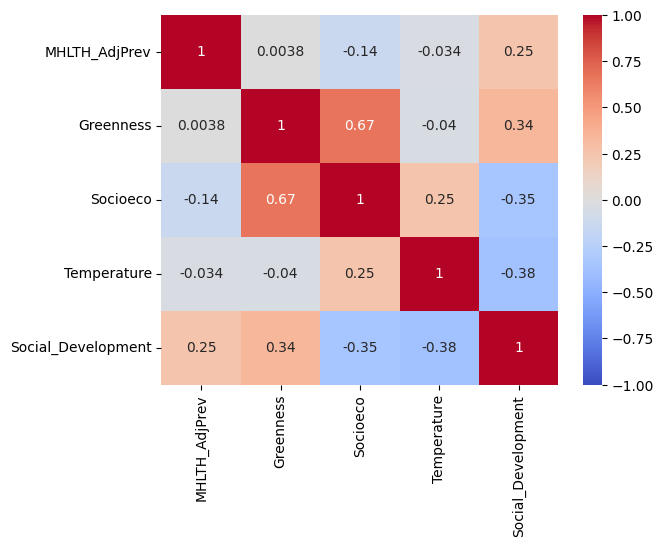

In [84]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Key Environmental Factors')
# plt.show()

Below heatmaps are less informative

In [70]:
# spearate corr by social_development
# threshold = combine_df['Social_Development'].max() * 0.5

# corr_below_thre = combine_df[combine_df['Social_Development']<threshold][['MHLTH_AdjPrev','Greeness','Socioeco','Temperature','Social_Development']].corr()
# corr_above_thre = combine_df[combine_df['Social_Development']>=threshold][['MHLTH_AdjPrev','Greeness','Socioeco','Temperature','Social_Development']].corr()

In [85]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# ax1, ax2 = ax
# sns.heatmap(corr_below_thre, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1)
# sns.heatmap(corr_above_thre, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
# ax1.set_title('Correlation Matrix of Key Environmental Factors (Social Development < 50%)')
# ax2.set_title('Correlation Matrix of Key Environmental Factors (Social Development >= 50%)')

# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
# _ =ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)